In [1]:
import pandas as pd

In [76]:
# Load the data
df = pd.read_csv('C:/Users/user/OneDrive/Desktop/datascience/Amazon Sale Report.csv')

In [77]:
# Display the first few rows of the DataFrame
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [78]:
# Check for missing values
print(df.isnull().sum())

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [80]:
print(df["currency"].unique())


['INR' nan]


In [81]:
df["currency"] = df["currency"].ffill()



In [82]:
print(df["currency"].isnull().sum())  # Should be 0
print(df["currency"].unique())  # Should only contain 'INR'


0
['INR']


In [83]:
df.drop(columns=["fulfilled-by", "New", "PendingS"], inplace=True)


In [84]:
print(df.isnull().sum())

index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64


In [85]:
print(df.isnull().sum())  # Check missing values
print(df["ship-country"].value_counts())  # Verify most frequent country
print(df["Amount"].describe())  # Check sales values distribution


index                    0
Order ID                 0
Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Category                 0
Size                     0
Courier Status           0
Qty                      0
currency                 0
Amount                7800
ship-city               35
ship-state              35
ship-postal-code        35
ship-country            35
B2B                      0
dtype: int64
ship-country
IN    128941
Name: count, dtype: int64
count    121176.000000
mean        648.562176
std         281.185041
min           0.000000
25%         449.000000
50%         605.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64


In [86]:
df["Amount"] = df["Amount"].interpolate(method="linear")



In [87]:
print(df["Amount"].isnull().sum())  # Should return 0


0


In [88]:
df[["ship-city", "ship-state", "ship-postal-code"]] = df[["ship-city", "ship-state", "ship-postal-code"]].ffill()



In [89]:
print(df.isnull().sum())  # Should return 0 for all columns


index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Category               0
Size                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-postal-code       0
ship-country          35
B2B                    0
dtype: int64


In [90]:
df["ship-country"] = df["ship-country"].fillna("IN")



In [91]:
print(df.isnull().sum())  # Should return 0 for all columns


index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
dtype: int64


In [92]:
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\user\AppData\Local\Temp\ipykernel_12488\3386729631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [93]:
print(df['Date'].dtype)  # Should return "datetime64[ns]"
print(df['Date'].min(), df['Date'].max())  # Check the date range


datetime64[ns]
2022-03-31 00:00:00 2022-06-29 00:00:00


In [94]:
import matplotlib.pyplot as plt



In [95]:
# Aggregate sales data by month
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()


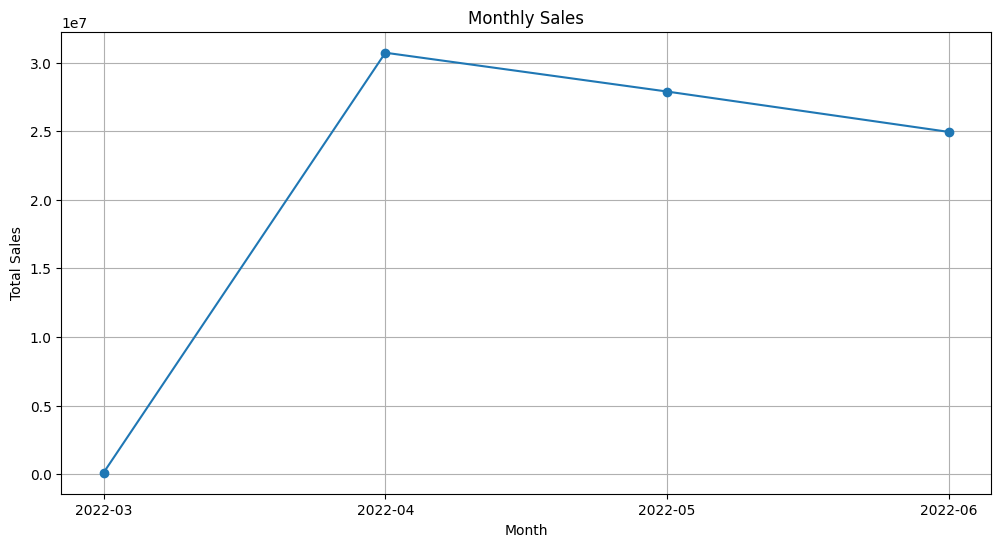

In [96]:

# Plot monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Amount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.grid(True)
plt.show()

In [27]:
import seaborn as sns

In [28]:
# Aggregate quantities sold by category
category_sales = df.groupby('Category')['Qty'].sum().reset_index()

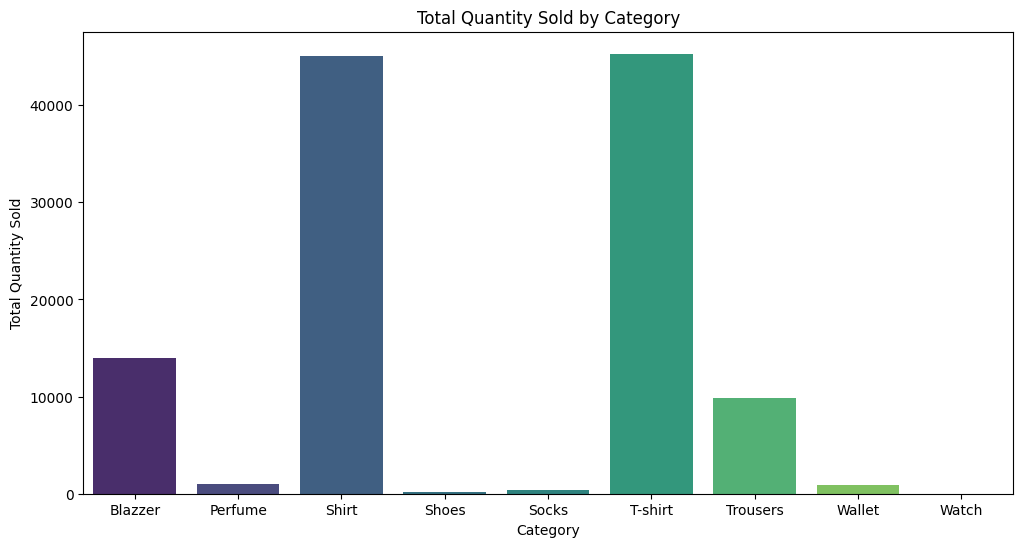

In [30]:
# Plot quantities sold by category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Qty', hue='Category', data=category_sales, palette='viridis', legend=False)
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Category')
plt.show()

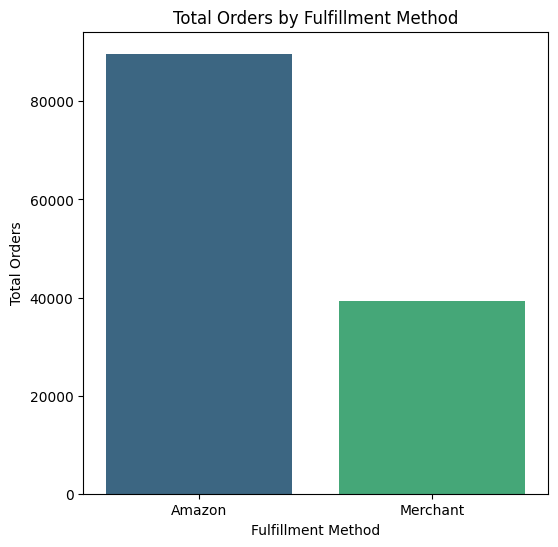

In [39]:
# Plot total orders by fulfillment method
plt.figure(figsize=(6, 6))
sns.barplot(x='Fulfilment', y='Total Orders', hue='Fulfilment', data=fulfillment_total, palette='viridis', dodge=False)
plt.xlabel('Fulfillment Method')
plt.ylabel('Total Orders')
plt.title('Total Orders by Fulfillment Method')
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

<Figure size 1200x800 with 0 Axes>

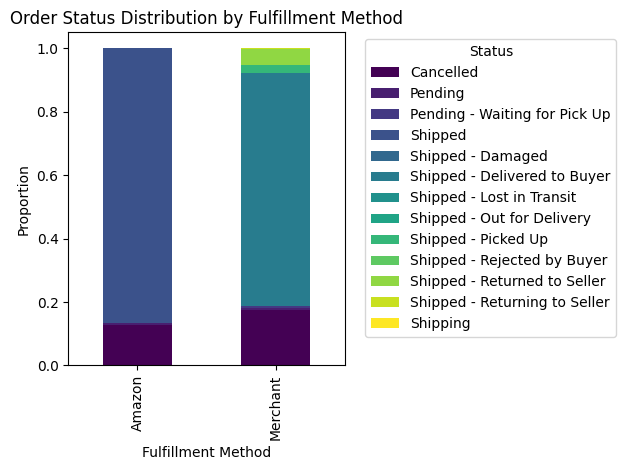

In [33]:
# Analyze the success rate of each fulfillment method
plt.figure(figsize=(12, 8))
order_status_distribution = df.groupby('Fulfilment')['Status'].value_counts(normalize=True).unstack()
order_status_distribution.plot(kind='bar', stacked=True, title='Order Status Distribution by Fulfillment Method', colormap='viridis')
plt.xlabel('Fulfillment Method')
plt.ylabel('Proportion')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
# Aggregate data by fulfillment method and status
fulfillment_status = df.groupby(['Fulfilment', 'Status']).size().reset_index(name='Count')

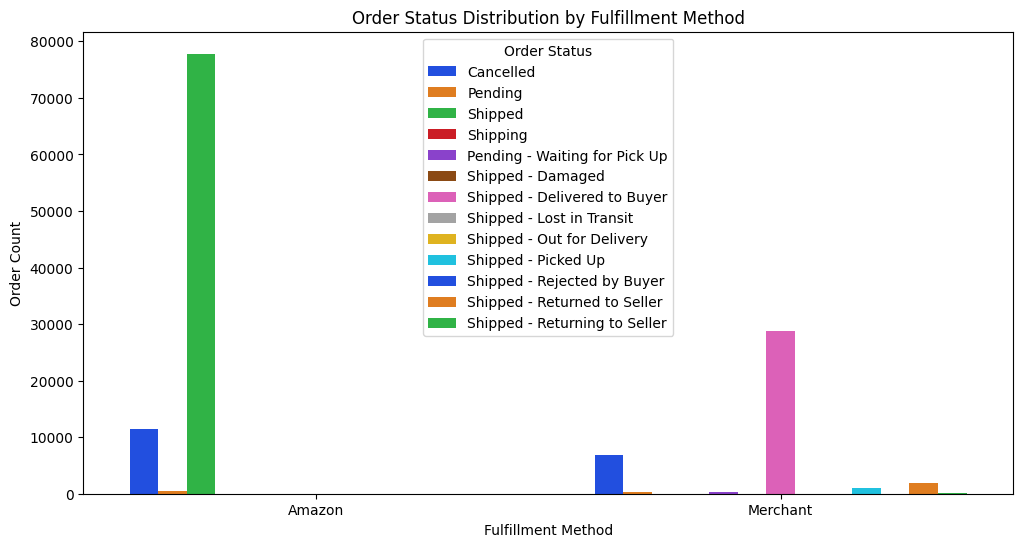

In [32]:
# Plot order status distribution by fulfillment method
plt.figure(figsize=(12, 6))
sns.barplot(x='Fulfilment', y='Count', hue='Status', data=fulfillment_status, palette='bright')
plt.xlabel('Fulfillment Method')
plt.ylabel('Order Count')
plt.title('Order Status Distribution by Fulfillment Method')
plt.legend(title='Order Status')
plt.show()

In [46]:

# Group by state
state_segmentation = df.groupby('ship-state').agg({
    'Order ID': 'count',       # Number of orders
    'Amount': ['sum', 'mean']  # Total revenue & Avg order value
}).reset_index()

# Rename columns
state_segmentation.columns = ['State', 'Total Orders', 'Total Revenue', 'Avg Order Value']

# Sort by highest revenue
state_segmentation = state_segmentation.sort_values(by='Total Revenue', ascending=False)

print(state_segmentation.head())

            State  Total Orders  Total Revenue  Avg Order Value
28    MAHARASHTRA         22276   1.412376e+07       634.034616
23      KARNATAKA         17327   1.109066e+07       640.079632
57      TELANGANA         11333   7.374161e+06       650.680425
59  UTTAR PRADESH         10651   7.268880e+06       682.459880
56     TAMIL NADU         11496   6.965362e+06       605.894357


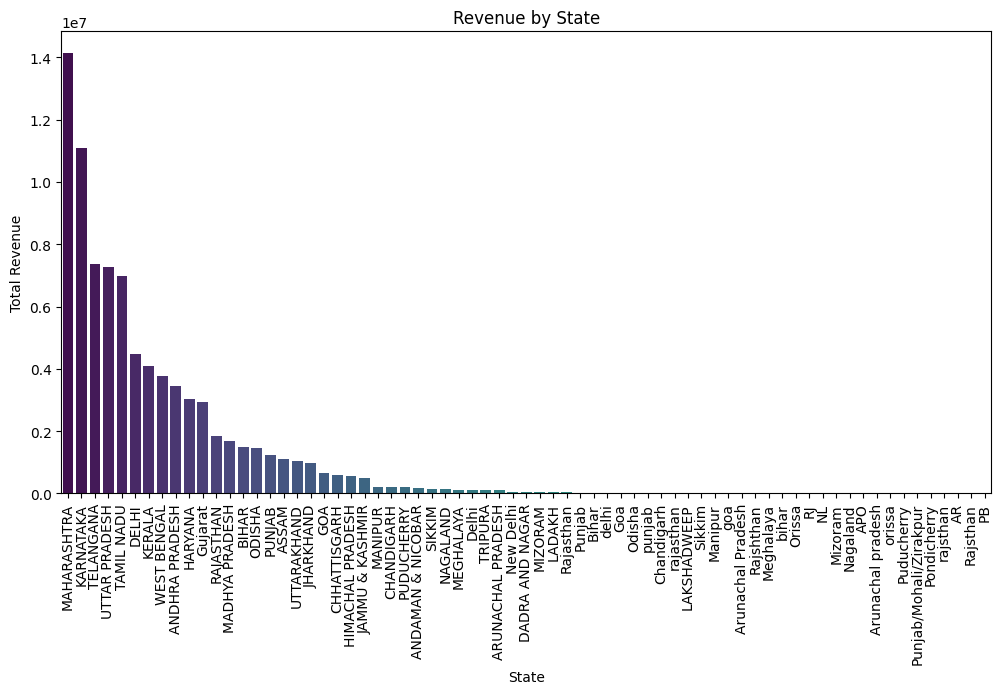

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total Revenue', data=state_segmentation, hue='State', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Revenue by State')
plt.show()


In [49]:
# Group by city
city_segmentation = df.groupby('ship-city').agg({
    'Order ID': 'count',
    'Amount': ['sum', 'mean']
}).reset_index()

# Rename columns
city_segmentation.columns = ['City', 'Total Orders', 'Total Revenue', 'Avg Order Value']
city_segmentation = city_segmentation.sort_values(by='Total Revenue', ascending=False)

print(city_segmentation.head())


           City  Total Orders  Total Revenue  Avg Order Value
775   BENGALURU         11210   7.202518e+06       642.508255
2904  HYDERABAD          8080   5.249484e+06       649.688644
4793     MUMBAI          6126   3.872649e+06       632.166021
5391  NEW DELHI          5796   3.834278e+06       661.538645
1464    CHENNAI          5434   3.296064e+06       606.563098


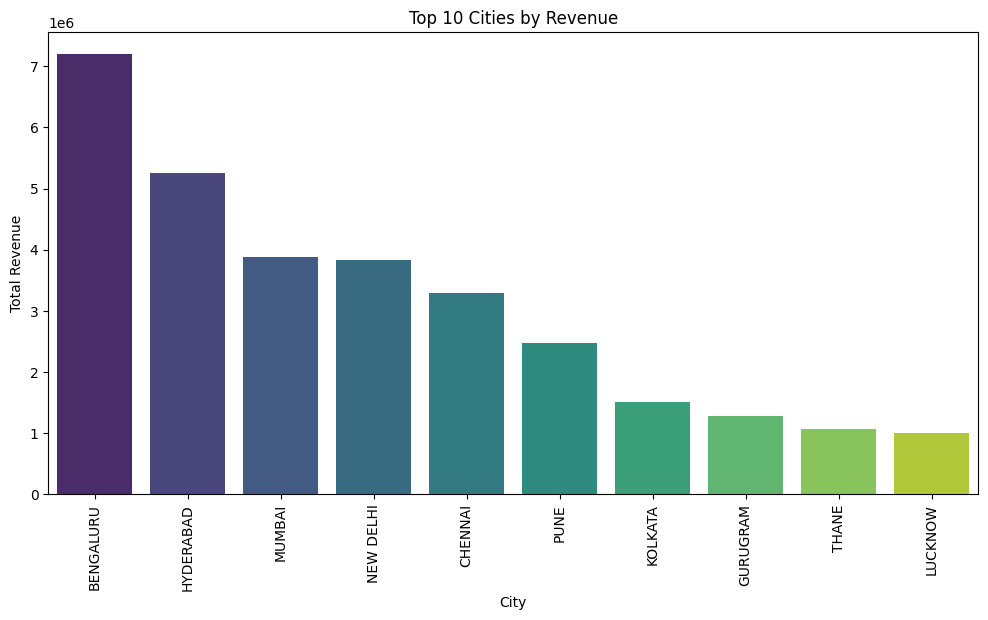

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total Revenue', data=city_segmentation.head(10), hue='City', legend=False, palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Cities by Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()




In [67]:
# Export to CSV
df.to_csv("preprocessed_data.csv", index=False)


In [59]:
# Export to Excel
df.to_excel("preprocessed_data.xlsx", index=False)


In [97]:
df['Month'] = df['Date'].dt.month

In [103]:
df['Year'] = df['Date'].dt.year

In [104]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,Month,Total Selling Value,Total Buying Value,Profit,Profit%,Year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MAHARASHTRA,400081.0,IN,False,4,647.62,453.334,194.286,42.857143,2022
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,KARNATAKA,560085.0,IN,False,4,406.00,284.200,121.800,42.857143,2022
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,MAHARASHTRA,410210.0,IN,True,4,329.00,230.300,98.700,42.857143,2022
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,PUDUCHERRY,605008.0,IN,False,4,753.33,527.331,225.999,42.857143,2022
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,TAMIL NADU,600073.0,IN,False,4,574.00,401.800,172.200,42.857143,2022


In [105]:
# Create a new column for total buying value
df['Total Buying Value'] = df['Amount'] * 0.7  # Assuming buying value is 70% of selling value

# Display the updated DataFrame
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,Month,Total Selling Value,Total Buying Value,Profit,Profit%,Year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MAHARASHTRA,400081.0,IN,False,4,647.62,453.334,194.286,42.857143,2022
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,KARNATAKA,560085.0,IN,False,4,406.00,284.200,121.800,42.857143,2022
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,MAHARASHTRA,410210.0,IN,True,4,329.00,230.300,98.700,42.857143,2022
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,PUDUCHERRY,605008.0,IN,False,4,753.33,527.331,225.999,42.857143,2022
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,TAMIL NADU,600073.0,IN,False,4,574.00,401.800,172.200,42.857143,2022


In [106]:
# Assuming 'Amount' is the total selling value
df['Total Selling Value'] = df['Amount']

# Calculate profit and profit percentage
df['Profit'] = df['Total Selling Value'] - df['Total Buying Value']
df['Profit%'] = (df['Profit'] / df['Total Buying Value']) * 100

# Display the updated DataFrame
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,ship-country,B2B,Month,Total Selling Value,Total Buying Value,Profit,Profit%,Year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MAHARASHTRA,400081.0,IN,False,4,647.62,453.334,194.286,42.857143,2022
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,KARNATAKA,560085.0,IN,False,4,406.00,284.200,121.800,42.857143,2022
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,MAHARASHTRA,410210.0,IN,True,4,329.00,230.300,98.700,42.857143,2022
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,PUDUCHERRY,605008.0,IN,False,4,753.33,527.331,225.999,42.857143,2022
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,TAMIL NADU,600073.0,IN,False,4,574.00,401.800,172.200,42.857143,2022


In [107]:
# Aggregate total selling value and profit by month
monthly_aggregation = df.groupby(['Year', 'Month']).agg({
    'Total Selling Value': 'sum',
    'Profit': 'sum'
}).reset_index()

# Display the aggregated data
monthly_aggregation.head()

,Year,Month,Total Selling Value,Profit
0,2022,3,107016.11,32104.833
1,2022,4,30715529.63,9214658.889
2,2022,5,27885469.69,8365640.907
3,2022,6,24942151.94,7482645.582


In [108]:
# Verify the columns
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'Month', 'Total Selling Value',
       'Total Buying Value', 'Profit', 'Profit%', 'Year'],
      dtype='object')


In [109]:
# Display the aggregated data
monthly_aggregation.head()

,Year,Month,Total Selling Value,Profit
0,2022,3,107016.11,32104.833
1,2022,4,30715529.63,9214658.889
2,2022,5,27885469.69,8365640.907
3,2022,6,24942151.94,7482645.582


In [110]:
# Aggregate total selling value by master data product
product_aggregation = df.groupby('Category').agg({
    'Total Selling Value': 'sum'
}).reset_index()

In [111]:
# Assuming 'Sales Channel' is the payment mode
# Aggregate total selling value by payment mode
payment_mode_aggregation = df.groupby('Sales Channel').agg({
    'Total Selling Value': 'sum'
}).reset_index()

In [112]:
# Aggregate total selling value by master data category
category_aggregation = df.groupby('Category').agg({
    'Total Selling Value': 'sum'
}).reset_index()

In [113]:

# Export the main DataFrame
df.to_csv('preprocessed_data.csv', index=False)

In [114]:
# Export the aggregated data
monthly_aggregation.to_csv('monthly_aggregation.csv', index=False)
product_aggregation.to_csv('product_aggregation.csv', index=False)
payment_mode_aggregation.to_csv('payment_mode_aggregation.csv', index=False)
category_aggregation.to_csv('category_aggregation.csv', index=False)

In [115]:
# Export the main DataFrame and aggregated data to an Excel file with multiple sheets
with pd.ExcelWriter('aggregated_data.xlsx') as writer:
    df.to_excel(writer, sheet_name='Preprocessed Data', index=False)
    monthly_aggregation.to_excel(writer, sheet_name='Monthly Aggregation', index=False)
    product_aggregation.to_excel(writer, sheet_name='Product Aggregation', index=False)
    payment_mode_aggregation.to_excel(writer, sheet_name='Payment Mode Aggregation', index=False)
    category_aggregation.to_excel(writer, sheet_name='Category Aggregation', index=False)

In [118]:

# Calculate overall profit and profit percentage
total_selling_value = df['Total Selling Value'].sum()
total_buying_value = df['Total Buying Value'].sum()
overall_profit = total_selling_value - total_buying_value
overall_profit_percentage = (overall_profit / total_buying_value) * 100
df['Month Name'] = df['Date'].dt.strftime('%B')

In [117]:
# Print overall profit and profit percentage
print(f"Overall Profit: {overall_profit}")
print(f"Overall Profit Percentage: {overall_profit_percentage:.2f}%")

Overall Profit: 25095050.211000018
Overall Profit Percentage: 42.86%


In [119]:
# Create a DataFrame for overall profit and profit percentage
overall_metrics = pd.DataFrame({
    'Metric': ['Total Selling Value', 'Total Buying Value', 'Overall Profit', 'Overall Profit Percentage'],
    'Value': [total_selling_value, total_buying_value, overall_profit, overall_profit_percentage]
})

In [120]:
# Aggregate total selling value and profit by month
monthly_aggregation = df.groupby(['Year', 'Month', 'Month Name']).agg({
    'Total Selling Value': 'sum',
    'Profit': 'sum'
}).reset_index()

In [121]:
# Export overall metrics and monthly aggregation to a separate Excel file
with pd.ExcelWriter('overall_metrics.xlsx') as writer:
    overall_metrics.to_excel(writer, sheet_name='Overall Metrics', index=False)
    monthly_aggregation.to_excel(writer, sheet_name='Monthly Aggregation', index=False)